## 0. Installation and import dependencies

In [1]:
!pip install -q mediapipe opencv-python


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import mediapipe as mp
import cv2 as cv
import numpy as np
import uuid
import os


In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

## 1. Draw Hands
<img src="https://developers.google.com/static/mediapipe/images/solutions/hand-landmarks.png" height="300px">

In [16]:
cap = cv.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()

        # BGR 2 RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        image = cv.flip(image, 1)

        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)

        image.flags.writeable = True

        # RGB 2 BGR
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)

        # print(results)

        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                          mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                          mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                )

        cv.imshow("Hand Tracking", image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

In [11]:
# results.multi_hand_landmarks
# mp_hands.HAND_CONNECTIONS
mp_drawing.draw_landmarks?

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
)
Docstring:
Draws the landmarks and the connections on the image.

Args:
  image: A three channel BGR image represented as numpy ndarray.
  landmark_list: A normalized landmark list proto message to be annotated on
    the image.
  connections: A list of landmark index tuples that specifies how landmarks to
    be connected in the drawi

## 2. Output Images

In [17]:
os.mkdir("tmp/output_images")

## 3. Detect Left and Right Hand

In [22]:
# results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.WRIST.value]
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.PINKY_TIP.value]

x: 0.28029484
y: 0.28237563
z: -0.032596584

In [42]:
results.multi_handedness

[classification {
   index: 1
   score: 0.9674779
   label: "Right"
 }]

In [43]:
def get_label(index, hand, results):
    classification = results.multi_handedness[index]
    label = classification.classification[0].label
    score = classification.classification[0].score
    text = '{} {}'.format(label, round(score, 2))

    # Extract coordinates
    coords = tuple(np.multiply(
        np.array((hand.landmark[mp_hands.HandLandmark.WRIST.value].x, hand.landmark[mp_hands.HandLandmark.WRIST.value].y)),
        [1280, 720]).astype(int)
    )
    output = text, coords

    return output

In [44]:
get_label(0, hand, results)

('Right 0.97', (1008, 480))

In [46]:
cap = cv.VideoCapture(0)


with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()

        # BGR 2 RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        # flip on horizontal
        image = cv.flip(image, 1)
        image.flags.writeable = False

        # Detections
        results = hands.process(image)

        # RGB 2 BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                            mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                    )
                if label_data := get_label(num, hand, results):
                    text, coord = label_data
                    cv.putText(image, text, coord, cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
                    
                
        cv.imshow("Hand Tracking", image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

('Left 0.95', (431, 553))
('Left 0.89', (405, 506))
('Left 0.94', (394, 481))
('Left 0.96', (383, 478))
('Left 0.96', (377, 479))
('Left 0.96', (374, 477))
('Left 0.97', (373, 475))
('Left 0.96', (365, 468))
('Left 0.95', (362, 463))
('Left 0.98', (359, 438))
('Left 0.98', (352, 425))
('Left 0.99', (347, 415))
('Left 0.99', (349, 407))
('Left 0.99', (356, 415))
('Left 0.99', (360, 411))
('Left 0.99', (359, 410))
('Right 0.97', (929, 560))
('Left 1.0', (359, 403))
('Right 0.97', (876, 509))
('Left 1.0', (360, 406))
('Right 0.98', (833, 454))
('Left 1.0', (355, 408))
('Right 0.96', (803, 411))
('Left 0.99', (351, 408))
('Right 0.98', (778, 382))
('Left 1.0', (351, 409))
('Right 0.97', (769, 376))
('Left 1.0', (348, 407))
('Right 0.98', (764, 373))
('Left 0.99', (349, 411))
('Right 0.98', (762, 371))
('Left 0.93', (350, 407))
('Right 0.99', (760, 360))
('Left 0.68', (360, 390))
('Right 0.99', (764, 348))
('Left 0.93', (367, 391))
('Right 0.99', (766, 338))
('Left 0.95', (380, 383))
('Righ

## 4. Calculate Multiple Angles

In [47]:
!pip install -q matplotlib


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [49]:
from matplotlib import pyplot as plt

In [73]:
joint_list = [[8,7,6], [12,11,10], [4, 3, 2], [1, 0, 5]]

In [74]:
def draw_finger_angles(image, results, joint_list):
    for hand in results.multi_hand_landmarks:
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y])
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y])
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y])

            radians = np.arctan2(c[1]-b[1], c[0] - b[1]) - np.arctan2(a[1]-b[1], a[0]-b[0])

            angle = np.abs(radians*180.0/np.pi)

            if angle > 180.0:
                angle = 360 - angle
            
            cv.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [1280, 720]).astype(int)),
                cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv.LINE_AA
            )
    return image


In [80]:
cap = cv.VideoCapture(0)


with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()

        # BGR 2 RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        # flip on horizontal
        image = cv.flip(image, 1)
        image.flags.writeable = False

        # Detections
        results = hands.process(image)

        # RGB 2 BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                            mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                    )
                # if label_data := get_label(num, hand, results):
                #     text, coord = label_data
                #     cv.putText(image, text, coord, cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
                    
            draw_finger_angles(image, results, joint_list)
        cv.imshow("Hand Tracking", image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

In [78]:
test_image = draw_finger_angles(image, results, joint_list)

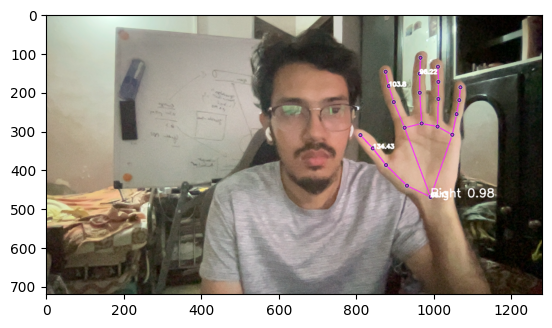

In [79]:
plt.imshow(cv.cvtColor(test_image, cv.COLOR_BGR2RGB))